<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
from random import random
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
iowa_file = '/Users/tlee010/desktop/DSI-SF-2-timdavidlee/datasets/Iowa/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
print len(iowa)
print iowa.info()

# #too many rows, will subset
# sample_row_nos = np.random.randint(0, len(iowa), size= 250000)
# i_df = iowa.iloc[sample_row_nos,:] 

i_df = iowa

print 'subsetted the data set --------- >'
print i_df.describe()

i_df.head(5)

270955
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4),

/Users/tlee010/anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [4]:
print i_df.info()
i_df.describe()
# all the pricing needs to be cleaned and turned into float

# category is fixed later in the process

# county is blank need to be filled
import math
county_key = { x[1]:x[0] for x in i_df[['County','City']].values}
def fillcounty(x):
    if str(county_key.get(x['City'])) =='nan':
        x['County'] = 'Other'
    else:  
        x['County'] = county_key[x['City']]
    return x

i_df = i_df.apply(fillcounty,axis=1)

print i_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

### 3.2 Clean the columns

In [5]:
def clean_amounts(x):
    x['State Bottle Cost'] = float(x['State Bottle Cost'].replace('$',''))
    x['State Bottle Retail'] = float(x['State Bottle Retail'].replace('$',''))
    x['Sale (Dollars)'] = float(x['Sale (Dollars)'].replace('$',''))
    return x

i_df_clean = i_df.apply(clean_amounts, axis=1)

i_df_clean.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [6]:
#fix the date columns
import datetime as dt
import time as tm

# --- alternate approach - but took too long with larger dataset
# def clean_dates(x):
#     x['YEAR'] = x['Date'][-4:]
#     x['MONTH'] = x['Date'][0:2]
#     x['INTMONTH'] = int(x['Date'][0:2])   
#     x['PERIOD'] = x['Date'][-4:] + x['Date'][0:2]
#     x['DATE'] = tm.strptime(x['Date'],'%m/%d/%Y')
#     x['NUMDATE'] = dt.datetime.strptime(x['Date'],'%m/%d/%Y')
#     return x

# i_df_clean = i_df_clean.apply(clean_dates, axis=1)

i_df_clean['MONTH'] = i_df_clean['Date'].map(lambda val: val[0:2])
i_df_clean['YEAR'] = i_df_clean['Date'].map(lambda val: val[-4:])
i_df_clean['INTMONTH'] = i_df_clean['Date'].map(lambda val: int(val[0:2]))
i_df_clean['PERIOD'] = i_df_clean['Date'].map(lambda val: val[-4:]+val[0:2])
#i_df_clean['DATE'] = pd.to_datetime(i_df_clean['Date'])
#i_df_clean['NUMDATE'] = i_df_clean['Date'].map(lambda val: dt.datetime.strptime(val,'%m/%d/%Y'))


i_df_clean.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),MONTH,YEAR,INTMONTH,PERIOD
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.0,2.38,11,2015,11,201511
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,13.75,20.63,2,41.26,1.5,0.40,03,2016,3,201603
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,12.59,18.89,24,453.36,24.0,6.34,02,2016,2,201602
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,9.50,14.25,6,85.50,10.5,2.77,02,2016,2,201602
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,7.20,10.80,12,129.60,21.0,5.55,08,2015,8,201508


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [7]:

store_periods = pd.pivot_table(i_df_clean, values='PERIOD', aggfunc = ([max,min]), index = 'Store Number')
store_periods.reset_index(inplace=True)

def subtract(x):
    if x['max'][:4] == x['min'][:4]:
        x['month_diff'] = int(x['max'][-2:]) - int(x['min'][-2:])
        #print 'same date ', x['max'], x['min'], x['month_diff']
    else:
        x['month_diff'] = int(x['max'][-2:]) + 12 - int(x['min'][-2:])
        #print 'crossover date ', x['max'], x['min'], x['month_diff']
    return x
store_periods = store_periods.apply(subtract, axis = 1)

#print store_periods

i_df_clean_merge = i_df_clean.merge(store_periods[['Store Number','month_diff']], how='left', on='Store Number')
i_df_clean_merge.head(5)

i_df_clean2 = i_df_clean_merge[i_df_clean_merge['month_diff'] >=12].copy()
print i_df_clean2.shape, i_df_clean.shape

(258194, 23) (270955, 22)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [8]:
#print i_df_clean.head()

# Group by year and store number - summing sales
summary51 = i_df_clean2[i_df_clean2['YEAR']=='2015'].groupby(['YEAR','Store Number'])[['Sale (Dollars)']].sum()
summary51.reset_index(inplace=True)
summary51.sort_values('Sale (Dollars)',ascending = False, inplace=True)
summary51.head(20)

,YEAR,Store Number,Sale (Dollars)
121,2015,2633,1000783.30
953,2015,4829,878812.70
178,2015,3385,441983.55
33,2015,2512,419746.83
184,2015,3420,352020.66
364,2015,3952,333311.98
300,2015,3814,247417.42
177,2015,3354,240365.94
283,2015,3773,232460.41
149,2015,2670,227442.71


### 5.2 Calculate the profit each store is making in 2015.


In [9]:
#calculate total profit 
i_df_clean2['total_profit'] = (i_df_clean2['State Bottle Retail'] - i_df_clean2['State Bottle Cost']) * i_df_clean2['Bottles Sold']

#then sum the total profit per store number
summary52 = i_df_clean2[i_df_clean2['YEAR'] =='2015'].groupby(['YEAR','Store Number'])[['Sale (Dollars)','total_profit']].sum()
summary52.reset_index(inplace=True)
summary52.sort_values('total_profit', ascending=False, inplace=True)
summary52.head(20)

,YEAR,Store Number,Sale (Dollars),total_profit
121,2015,2633,1000783.30,333816.91
953,2015,4829,878812.70,293196.99
178,2015,3385,441983.55,147884.62
33,2015,2512,419746.83,140143.46
184,2015,3420,352020.66,117593.34
364,2015,3952,333311.98,111230.21
300,2015,3814,247417.42,83004.48
177,2015,3354,240365.94,80244.69
283,2015,3773,232460.41,77525.08
149,2015,2670,227442.71,75945.64


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [10]:
# calculate profit per gallon, using total profit from before
i_df_clean2['profit_per_gallon'] = i_df_clean2['total_profit'] / i_df_clean2['Volume Sold (Gallons)']

# calculate profit per gallon, using mean profit per gallon from before
top_counties = i_df_clean2[i_df_clean2['YEAR']=='2015'].groupby('County')[['profit_per_gallon']].mean().sort_values('profit_per_gallon',ascending=False)
top_counties.reset_index(inplace=True)
print top_counties[:10]

# -- do it overall - total profit divided by total gallon
top_counties2 = i_df_clean2[i_df_clean2['YEAR']=='2015'].groupby('County')[['total_profit','Volume Sold (Gallons)']].sum()
top_counties2['profit_per_gallon'] = top_counties2['total_profit']/top_counties2['Volume Sold (Gallons)']
top_counties2.sort_values('profit_per_gallon',ascending = False, inplace=True)
print top_counties2[:10]

        County  profit_per_gallon
0         Polk          25.034424
1      Johnson          24.455659
2    Jefferson          24.142467
3        Scott          24.005751
4  Buena Vista          23.756480
5        Story          23.640091
6   Des Moines          23.559430
7   Washington          23.546474
8   Black Hawk          23.481562
9     Woodbury          23.260620
               total_profit  Volume Sold (Gallons)  profit_per_gallon
County                                                               
Johnson           565008.51               27484.48          20.557366
Polk             2067935.23              103996.88          19.884589
Scott             692249.96               35792.85          19.340454
Jefferson          27971.47                1448.58          19.309579
Dallas             70251.61                3649.83          19.247913
Des Moines        127112.21                6710.25          18.942992
Woodbury          331362.81               17698.69          18.722

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

               total_profit  Volume Sold (Gallons)
County                                            
Polk             2067935.23              103996.88
Linn              839931.38               46733.91
Scott             692249.96               35792.85
Johnson           565008.51               27484.48
Black Hawk        521241.93               28361.75
Pottawattamie     334777.14               18053.31
Woodbury          331362.81               17698.69
Dubuque           292759.03               17079.48
Story             284502.68               15556.29
Cerro Gordo       189428.25               11277.97


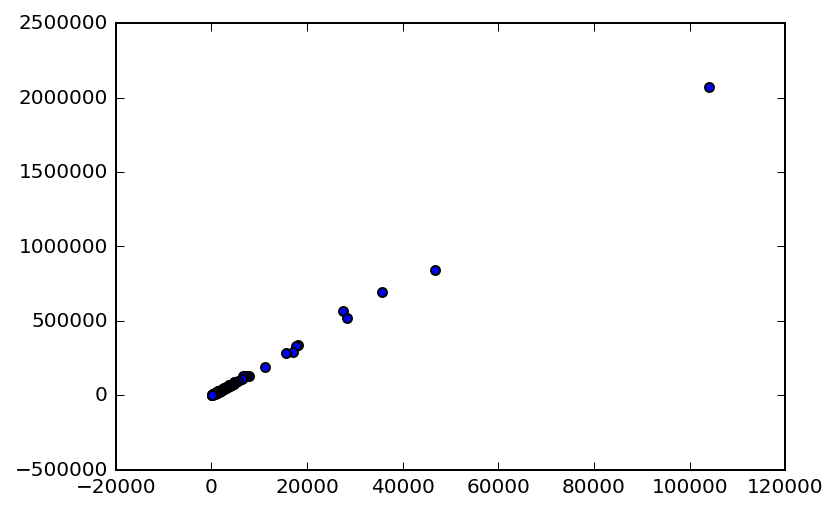

In [11]:
#print i_df_clean.head()

#do a group. Assume that store size is related to the total volume of alcohol that has been sold
store_scale_size = i_df_clean2[i_df_clean2['YEAR']=='2015'].groupby('County')[['total_profit','Volume Sold (Gallons)']].sum().sort_values('total_profit',ascending=False)

import matplotlib.pyplot as plt
print store_scale_size.head(10)
y = store_scale_size['total_profit'].values
x = store_scale_size['Volume Sold (Gallons)'].values


#plot the volume sold vs. the profit per gallon
plt.scatter(x,y)
plt.xlabel = 'Volumen Sold'
plt.ylabel = 'Profit per gallon'

# Answer : Yes, it appears that there is a positive correlation between the Volume
# sold and the Total profit per gallon

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [12]:
#i_df_clean.info()
#i_df_clean['Category Name'].fillna('None',inplace=True)

i_df_clean2['Category Name'].fillna('OTHER',inplace=True)

def broad_cat(x):
    if "VODKA" in x['Category Name']:
        x['broad_cat'] = 'VODKA'
    elif 'WHISK' in x['Category Name']:
        x['broad_cat'] = 'WHISKEY'
    elif 'RUM' in x['Category Name']:
        x['broad_cat'] = 'RUM'
    elif 'SCHNAPPS' in x['Category Name']:
        x['broad_cat'] = 'SCHNAPPS'
    elif 'GIN' in x['Category Name']:
        x['broad_cat'] = 'GIN'
    elif 'BRANDIES' in x['Category Name']:
        x['broad_cat'] = 'BRANDIES'
    elif 'LIQUEUR' in x['Category Name']:
        x['broad_cat'] = 'LIQUEUR'
    elif 'CREME' in x['Category Name']:
        x['broad_cat'] = 'CREME'
    elif 'CREAM' in x['Category Name']:
        x['broad_cat'] = 'CREME'
    else:
        x['broad_cat'] = 'OTHER'
    return x
        
i_df_clean2 = i_df_clean2.apply(broad_cat, axis=1)

### 5.7 Do relationships exist between the broader liquor type and profit?

In [13]:
print i_df_clean2.total_profit.sum()
# roughly 11 million

temp2 = i_df_clean2.groupby('broad_cat')['total_profit'].sum()
temp2.sort_values(ascending=False,inplace=True)
print temp2
# appears taht people really like whiskey, vodka, rum.
# other still has a lot of overall money, which probably could benefit from additional
# research


11235471.81
broad_cat
WHISKEY     3.977389e+06
VODKA       2.690630e+06
RUM         1.478870e+06
OTHER       1.203861e+06
LIQUEUR     7.215446e+05
BRANDIES    4.489568e+05
SCHNAPPS    4.116297e+05
GIN         2.938278e+05
CREME       8.762930e+03
Name: total_profit, dtype: float64


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [14]:
# see if you can back out the brand from the item description
# will use the item description to pull out labels
i_df_clean2['Item Description'].value_counts().head(10)

Black Velvet                     6816
Hawkeye Vodka                    6377
Five O'clock Vodka               4317
Smirnoff Vodka 80 Prf            3243
Captain Morgan Spiced Rum        3175
Seagrams 7 Crown Bl Whiskey      3131
Fireball Cinnamon Whiskey        2999
Jack Daniels Old #7 Black Lbl    2963
Absolut Swedish Vodka 80 Prf     2782
Bacardi Superior Rum             2682
Name: Item Description, dtype: int64

In [15]:
#print i_df_clean.info()


# will extract the brand from the item description name. 
#If the item description is 3 words, we will exclude the last
# if the item description is 4 words, we will exclude the last 2
def brand(x):
    if len(x['Item Description'].split()) <=3:
        x['brand'] = ' '.join(x['Item Description'].split()[:-1])
    else:
        x['brand'] = ' '.join(x['Item Description'].split()[:-2])
    return x
i_df_clean2 = i_df_clean2.apply(brand, axis=1)
i_df_clean2[['Item Description','brand']].head(10)


,Item Description,brand
0,Mr. Boston Apricot Brandy,Mr. Boston
1,Tin Cup,Tin
2,Jim Beam,Jim
3,1800 Ultimate Margarita,1800 Ultimate
4,Five O'clock Vodka,Five O'clock
5,New Amsterdam Gin,New Amsterdam
6,Korbel Brandy,Korbel
7,Canadian Club Whisky,Canadian Club
8,Absolut Swedish Vodka 80 Prf,Absolut Swedish Vodka
9,Dekuyper Hot Damn!,Dekuyper Hot


In [16]:
temp4 = i_df_clean2.groupby('brand')[['Sale (Dollars)','total_profit']].sum()
temp4.reset_index(inplace=True)
print temp4.sort_values('total_profit',ascending = False).head(20)

#top brands show a correlation to higher profits and sales as seen below
#in the top 

                      brand  Sale (Dollars)  total_profit
294          Captain Morgan      1892194.33     630873.03
194                   Black      1496171.65     511437.48
386             Crown Royal      1219030.85     406406.83
722     Jack Daniels Old #7      1159510.69     386579.12
532       Fireball Cinnamon      1070687.88     357015.37
0                                 939378.35     313537.57
639                 Hawkeye       694730.85     231784.94
41    Absolut Swedish Vodka       661669.08     220664.75
627              Grey Goose       620874.82     206979.45
1264         Smirnoff Vodka       509720.20     170046.88
128        Bacardi Superior       494349.60     165478.95
728            Jagermeister       492451.48     164186.83
545            Five O'clock       446401.86     148997.01
746                     Jim       440975.12     147907.38
771    Jose Cuervo Especial       440294.63     146803.01
948           New Amsterdam       410117.17     136706.85
159           

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

   Store Number              Item Description  total_profit  \
0          2106         1800 Reposado Tequila        278.28   
1          2106    360 Double Chocolate Vodka         14.00   
2          2106                Absolut Apeach        207.00   
3          2106  Absolut Citron (lemon Vodka)        408.00   
4          2106              Absolut Hibiskus         69.00   

   Volume Sold (Gallons)  
0                   7.13  
1                   0.80  
2                   7.14  
3                  14.27  
4                   2.38  
     Store Number  unique_items  total_profit  Volume Sold (Gallons)
121          2633           597     407050.11               20057.78
953          4829           556     363363.79               16772.70
178          3385           232     169428.70                9571.80
33           2512           636     177667.72                8823.47
184          3420           148     134488.32                7570.33
364          3952           322     130961.79

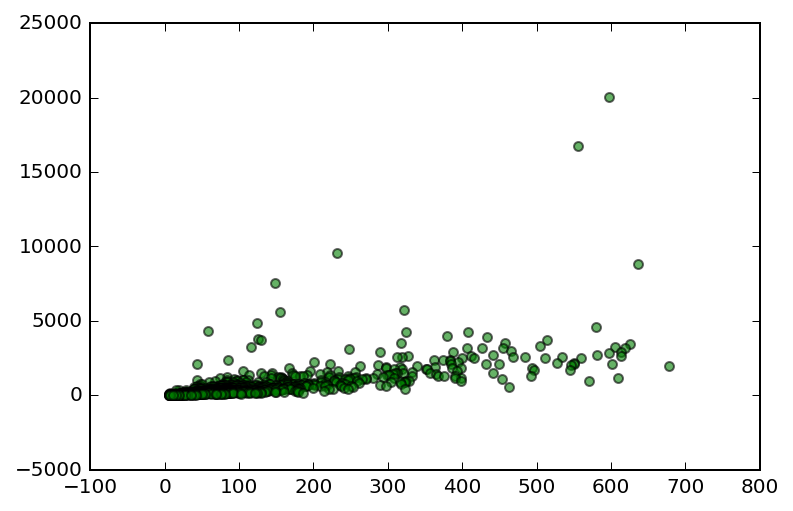

In [17]:
#i_df_clean.info()

# ------------------- Tax on stores with a number of unique Items?

temp6 = i_df_clean2.groupby(['Store Number','Item Description'])[['total_profit','Volume Sold (Gallons)']].sum()
temp6.reset_index(inplace = True)
print temp6.head(5)
def count_unique_items(x):
    x['unique_items'] = len(x['Item Description'])
    return x

temp6 = temp6.groupby('Store Number').apply(count_unique_items)

temp7 = temp6.groupby(['Store Number','unique_items'])[['total_profit','Volume Sold (Gallons)']].sum()
temp7.reset_index(inplace=True)
temp7.sort_values('Volume Sold (Gallons)',ascending=False, inplace=True)
print temp7.head(10)


plt.scatter(temp7['unique_items'], temp7['Volume Sold (Gallons)'], c='Green', alpha=0.6)
#plt.scatter(temp7['unique_items'], temp7['total_profit'], c='Blue', alpha=0.6)

# ------------------- most of the results are clustered on the low end. will try another assumption

     Store Number  unique_items  total_profit  Volume Sold (Gallons)
121          2633            63     407050.11               20057.78
953          4829            61     363363.79               16772.70
178          3385            54     169428.70                9571.80
33           2512            62     177667.72                8823.47
184          3420            45     134488.32                7570.33
364          3952            55     130961.79                5745.27
177          3354            47      98661.63                5621.65
186          3447            43      88020.50                4821.67
149          2670            61      94196.41                4585.03
300          3814            25     104045.40                4293.54


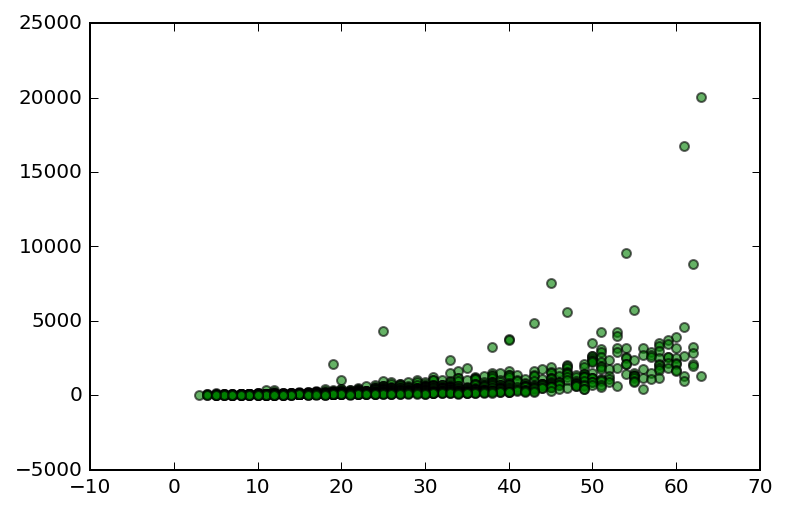

In [18]:
#i_df_clean.info()
# ------------------- Tax on stores with a number of unique Categories?

temp6 = i_df_clean2.groupby(['Store Number','Category Name'])[['total_profit','Volume Sold (Gallons)']].sum()
temp6.reset_index(inplace = True)
#print temp6.head(10)
def count_unique_items(x):
    x['unique_items'] = len(x['Category Name'])
    return x

temp6 = temp6.groupby('Store Number').apply(count_unique_items)

temp7 = temp6.groupby(['Store Number','unique_items'])[['total_profit','Volume Sold (Gallons)']].sum()
temp7.reset_index(inplace=True)
temp7.sort_values('Volume Sold (Gallons)',ascending=False,inplace=True)
print temp7.head(10)
plt.scatter(temp7['unique_items'], temp7['Volume Sold (Gallons)'], c='Green', alpha=0.6)
#plt.scatter(temp7['unique_items'], temp7['total_profit'], c='Blue', alpha=0.6)

In [82]:
#END Conclusion : || Tax on stores with a number of unique Categories ||

# would recommend taxing those who sell a large variety of liquor categories, would set the limit high, around 
# 45 distinct
print len(temp7['Store Number'].unique())
#1174 total stores

print temp7[temp7['unique_items']>=45]['Store Number'].count()
# 115 stores which is roughly the top 10%
print temp7[temp7['unique_items']>=45]['total_profit'].sum()
# $6,182,918 - of targetable profit that will be taxed

print temp7[temp7['unique_items']<45]['Store Number'].count()
# 1,019 stores
print temp7[temp7['unique_items']<45]['total_profit'].sum()
# $5,052,553



1174
155
6182918.11
1019
5052553.7


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [35]:
i_df_clean2.info()
i_df_clean2.head()
# added additional columns for Q115 and Q116

# def map_Q1(x):
#     if x['YEAR'] == '2016' and x['MONTH'] in ('01','02','03'):
#         x['Q116'] = x['Sale (Dollars)']
#         x['Q115'] = 0.0
#     elif x['YEAR'] == '2015' and x['MONTH'] in ('01','02','03'):
#         x['Q115'] = x['Sale (Dollars)']
#         x['Q116'] = 0.0        
#     else:
#         x['Q116'] = 0.0
#         x['Q115'] = 0.0        
#     return x

# i_df_clean3 = i_df_clean2.apply(map_Q1, axis=1)

i_df_clean3 = i_df_clean2.copy()
print i_df_clean3[(i_df_clean3['YEAR'] == '2016') & (i_df_clean3['MONTH'].isin(['01','02','03']))]
i_df_clean3['Q116'] = i_df_clean3[(i_df_clean3['YEAR'] == '2016') & (i_df_clean3['MONTH'].isin (['01','02','03']))]['Sale (Dollars)']
i_df_clean3['Q115'] = i_df_clean3[(i_df_clean3['YEAR'] == '2015') & (i_df_clean3['MONTH'].isin (['01','02','03']))]['Sale (Dollars)']
i_df_clean3['Q116'].fillna(0.0,inplace=True)
i_df_clean3['Q115'].fillna(0.0,inplace=True)
print i_df_clean3.info() # now has two additional columns 
print i_df_clean3.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 258194 entries, 0 to 270954
Data columns (total 27 columns):
Date                     258194 non-null object
Store Number             258194 non-null int64
City                     258194 non-null object
Zip Code                 258194 non-null object
County Number            257545 non-null float64
County                   258194 non-null object
Category                 258128 non-null float64
Category Name            258194 non-null object
Vendor Number            258194 non-null int64
Item Number              258194 non-null int64
Item Description         258194 non-null object
Bottle Volume (ml)       258194 non-null int64
State Bottle Cost        258194 non-null float64
State Bottle Retail      258194 non-null float64
Bottles Sold             258194 non-null int64
Sale (Dollars)           258194 non-null float64
Volume Sold (Liters)     258194 non-null float64
Volume Sold (Gallons)    258194 non-null float64
MONTH                  

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174 entries, 1093 to 1173
Data columns (total 8 columns):
Store Number             1174 non-null int64
County                   1174 non-null object
Q115                     1174 non-null float64
Q116                     1174 non-null float64
Volume Sold (Gallons)    1174 non-null float64
Bottles Sold             1174 non-null int64
sales_growth             1174 non-null float64
YoY_imp                  1174 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 82.5+ KB
None
      Store Number     County    Q115     Q116  Volume Sold (Gallons)  \
1093          5021  Dickinson   11.21   944.98                  66.27   
606           4401       Linn   47.72   931.17                  84.47   
1159          5103  Muscatine   42.76   733.19                  27.37   
1170          5128       Polk  477.00  7052.07                 605.66   
1001          4896  Allamakee   60.12   883.47                  84.06   

      Bottles

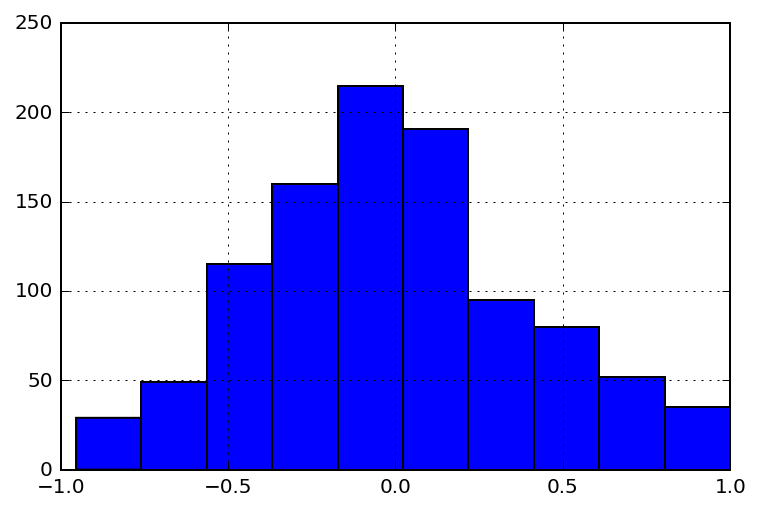

In [37]:
# use a relative growth metric
# will seek to do sales growth / Q115 sales = % increase

# will consolidate the columns by store number and county
i_df_clean4 = i_df_clean3.groupby(['Store Number', 'County'])[['Q115','Q116','Volume Sold (Gallons)','Bottles Sold']].sum()
i_df_clean4.reset_index(inplace=True)

# calculate the growth by subtracting the Quarterly YoY totals from each otehr
i_df_clean4['sales_growth'] = i_df_clean4['Q116'] - i_df_clean4['Q115']

# calculate the relative growth to the gross sales for the earlier quarter( Q116)
i_df_clean4['YoY_imp'] = i_df_clean4['sales_growth']/i_df_clean4['Q115']
i_df_clean4.sort_values('YoY_imp',inplace=True, ascending=False)


print i_df_clean4.info()
print i_df_clean4.head()
print i_df_clean4.YoY_imp.describe()

# distribution of % change...
i_df_clean4[i_df_clean4['YoY_imp']<=1.0].YoY_imp.hist()


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [38]:
# by county, do the median % growth weighted by bottles sold (volume)

# because some stores can drastically increase, but are low volume sales, will look at the area by county
# will use teh bottles sold for that region as a weight to look at the sales growth %

# median improve
def county_bottles(x):
    x['county_bottles_sold'] = float(sum(x['Bottles Sold']))
    return x

# create the bottles sold weighted pct % Store / county  = relative %
i_df_clean5 = i_df_clean4.groupby('County').apply(county_bottles)
i_df_clean5['Bottles Sold'] = i_df_clean5['Bottles Sold'].astype(float)
i_df_clean5['bottle_pct'] = i_df_clean5['Bottles Sold']/ i_df_clean5['county_bottles_sold'] 

# then once the bottles sold weight is calculated store relative to country
# we can calculate the county median Sales grow
i_df_clean5['county_median'] = i_df_clean5['bottle_pct']* i_df_clean5['YoY_imp']

# then once county sales growth median, we can summarize again
i_df_clean6 = i_df_clean5.groupby('County')[['county_median','Bottles Sold','Q115','Q116']].sum()
i_df_clean6.reset_index(inplace=True)

# then we do the same county --> overall iowa, using teh same bottle weighted pct
i_df_clean6['iowa_bottles_sold'] = i_df_clean6['Bottles Sold'].sum() * np.ones([len(i_df_clean6['County'].values),1])

# then now we calculate iowa's median sales growth
i_df_clean6['iowa_partial_median'] = i_df_clean6['Bottles Sold']/i_df_clean6['iowa_bottles_sold']*i_df_clean6['county_median']
i_df_clean6['iowa_median_imp'] = i_df_clean6['iowa_partial_median'].sum()* np.ones([len(i_df_clean6['County'].values),1])

# now we can look at the county's growth vs. iowa's overall sales growth
i_df_clean6['county_imp_vs_iowa'] = i_df_clean6['county_median'] - i_df_clean6['iowa_median_imp'] 
i_df_clean6.sort_values('county_imp_vs_iowa',ascending=False,inplace=True)
i_df_clean6.head(20)



# then look at county growth a deviation above all counties % growth
# iowa over all had 19% increase of sales increase from Q1 FY15 vs. FY16

# 


,County,county_median,Bottles Sold,Q115,Q116,iowa_bottles_sold,iowa_partial_median,iowa_median_imp,county_imp_vs_iowa
25,Decatur,3.411576,1788.0,3115.87,4375.82,2558808.0,0.002384,0.19556,3.216015
10,Butler,1.388421,2858.0,4694.47,8583.26,2558808.0,0.001551,0.19556,1.192861
22,Crawford,1.316452,11321.0,18823.90,37830.13,2558808.0,0.005824,0.19556,1.120892
14,Cedar,1.239877,6356.0,9921.67,19886.09,2558808.0,0.003080,0.19556,1.044317
1,Allamakee,1.219958,7452.0,14907.98,19106.29,2558808.0,0.003553,0.19556,1.024398
96,Worth,0.987196,2861.0,6046.25,11807.91,2558808.0,0.001104,0.19556,0.791636
31,Fayette,0.882618,10385.0,18185.53,32120.56,2558808.0,0.003582,0.19556,0.687058
61,Marion,0.815442,18377.0,38527.89,45029.24,2558808.0,0.005856,0.19556,0.619882
28,Dickinson,0.729538,31772.0,70696.32,63048.58,2558808.0,0.009058,0.19556,0.533978
11,Calhoun,0.651072,2127.0,3971.11,6581.49,2558808.0,0.000541,0.19556,0.455511


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [39]:
# back to the source detail data
# need county, and broad category
# total Profit
i_df_clean64 = i_df_clean3.groupby(['County'
                                    , 'broad_cat'])[['total_profit','Bottles Sold']].sum()
i_df_clean64.reset_index(inplace=True)
i_df_clean64.sort_values('total_profit', ascending=False, inplace= True)


# above is the overall sales metrics for 12-16 months. 
# but we should take into the account the market growth change
# will merge the country growth % relative to iowa to add additional detail
i_df_clean642 = i_df_clean64.merge(i_df_clean6[['County', 'county_median', 'county_imp_vs_iowa']], how='left', on='County')
i_df_clean642.head(20)

# discussion: one important note about the section below. The top profit was
# whiskey in Polk county, but if we look at the YoY score from the Q115
# and the Q116 it is a slight decreasing growth rate. The % decrease is .07 = 7%, but -64% 
# compared to the YoY of IOWA

# its impossible to know if it will continue to be so, but if a positive occurance is desired
# then we would go with whiskey in the Johnson county which had a 146% increase in sales,
# but also a 89% increase over the iowa state market media


,County,broad_cat,total_profit,Bottles Sold,county_median,county_imp_vs_iowa
0,Polk,WHISKEY,818209.76,148579,0.194039,-0.001521
1,Polk,VODKA,674194.74,183674,0.194039,-0.001521
2,Linn,WHISKEY,324152.85,63729,0.094982,-0.100578
3,Polk,OTHER,309081.73,60049,0.194039,-0.001521
4,Polk,RUM,293547.40,63750,0.194039,-0.001521
5,Linn,VODKA,260763.01,75213,0.094982,-0.100578
6,Scott,WHISKEY,259728.69,53015,0.111916,-0.083644
7,Johnson,WHISKEY,222634.31,38415,0.335644,0.140084
8,Scott,VODKA,211361.63,67908,0.111916,-0.083644
9,Johnson,VODKA,187551.29,47194,0.335644,0.140084


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [337]:

### --- didn't finish


# from datetime import datetime as dt
# min_numdate = i_df_clean3.NUMDATE.min()
# i_df_clean7 = i_df_clean3.copy()
# i_df_clean7.NUMDATE =(i_df_clean3.NUMDATE- min_numdate)/1000000000/60/60/24
# i_df_clean7.NUMDATE.value_counts()
# print i_df_clean7.head()


# i_df_clean7[i_df_clean7['Bottles Sold']==660]
# print i_df_clean7[i_df_clean7['Bottles Sold']==576]


# i_df_clean7.drop([1342,516],axis=0,inplace=True)
# print i_df_clean7['Bottles Sold'].max()
# plt.scatter(i_df_clean7['INTMONTH'], i_df_clean7['Sale (Dollars)'].values)
# median_sales = i_df_clean7.groupby('INTMONTH')[['Sale (Dollars)']].mean()
# median_sales.reset_index(inplace=True)
# plt.plot(median_sales.INTMONTH,median_sales['Sale (Dollars)'], color='Red')


   Bottle Volume (ml)  Bottles Sold   Category              Category Name  \
1                 750            12  1062310.0                 SPICED RUM   
2                 750             6  1011200.0  STRAIGHT BOURBON WHISKIES   
4                 750             2  1011200.0  STRAIGHT BOURBON WHISKIES   
6                1750             6  1012100.0          CANADIAN WHISKIES   
7                 750             1  1022100.0                    TEQUILA   

             City         County  County Number  \
1          WAUKEE         Dallas           25.0   
2  COUNCIL BLUFFS  Pottawattamie           78.0   
4         OTTUWMA        Wapello           90.0   
6       WINTERSET        Madison           61.0   
7      DES MOINES           Polk           77.0   

                                  DATE        Date  INTMONTH      ...       \
1    (2015, 3, 17, 0, 0, 0, 1, 76, -1)  03/17/2015         3      ...        
2   (2015, 12, 7, 0, 0, 0, 0, 341, -1)  12/07/2015        12      ...     

ValueError: labels [1342  516] not contained in axis

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?